# 数据预处理

列名及其解释

| **dt** | **kdcode** | **volume** | **turnover** | **turn** | **pct_chg**    | **vwap**   | **trade_status**                                             | **adj_close**  | **adj_open**     | **adj_high**   | **adj_low**    |
| ------ | ---------- | ---------- | ------------ | -------- | -------------- | ---------- | ------------------------------------------------------------ | -------------- | ---------------- | -------------- | -------------- |
| 日期   | 股票代码   | 成交量     | 成交额       | 换手率   | 涨跌幅度百分数 | 平均成交价 | 交易状态:0 正常；100 停牌一天；1 盘中停牌；2 停牌1小时以内，3停牌半天；101 其他 | 复权后的收盘价 | 复权后的开盘价格 | 复权后的最高价 | 复权后的最低价 |


In [1]:
import pandas as pd
from tqdm import tqdm
import numpy as np
df = pd.read_csv('data2.csv')
df = df.dropna(axis=0)
df

/home/tianhao/env4tiho_py36/lib/python3.6/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
Duplicate key in file PosixPath('/home/tianhao/env4tiho_py36/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc'), line 400 ('axes.unicode_minus: True  # use Unicode for the minus symbol rather than hyphen.  See')
/home/tianhao/env4tiho_py36/lib/python3.6/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


,dt,kdcode,volume,turnover,turn,pct_chg,vwap,trade_status,adj_close,adj_open,adj_high,adj_low
0,2016-01-04,000004.SZ,2283380.0,9.767487e+07,2.7223,-10.0000,42.776439,0,243.215104,270.239004,274.360296,243.215104
1,2016-01-05,000004.SZ,3883664.0,1.505349e+08,4.6303,-6.3665,38.761049,0,227.730821,220.783500,240.742328,218.899481
2,2016-01-06,000004.SZ,2114757.0,8.257999e+07,2.5213,1.2927,39.049400,0,230.674601,227.259816,235.502400,223.727280
3,2016-01-07,000004.SZ,456900.0,1.651672e+07,0.5447,-10.0051,36.149518,0,207.595366,226.671060,226.671060,207.595366
4,2016-01-08,000004.SZ,3077465.0,1.071972e+08,3.6691,0.6239,34.832959,0,208.890629,206.829983,214.895940,186.812279
...,...,...,...,...,...,...,...,...,...,...,...,...
4122506,2021-07-26,688600.SH,395800.0,6.140806e+06,0.5900,-0.3800,15.514923,0,15.590000,15.530000,15.680000,15.400000
4122507,2021-07-27,688600.SH,686800.0,1.094838e+07,1.0300,1.6000,15.941140,0,15.840000,15.640000,16.170000,15.590000
4122508,2021-07-28,688600.SH,502000.0,7.746032e+06,0.7500,-3.1600,15.430343,0,15.340000,15.800000,15.860000,15.150000
4122509,2021-07-29,688600.SH,436700.0,6.807372e+06,0.6500,1.5000,15.588212,0,15.570000,15.510000,15.790000,15.430000


## 0. 添加开盘价涨跌标签`label`

label可以尝试使用：
* label = 后一天adj_open - 当天adj_open
* label = 三天后adj_open - 当天adj_open
* label = 三天后平均adj_open - 当天adj_open (TODO 暂未尝试)

---
**方式1** label = 后一天adj_open - 当天adj_open

In [2]:
df_open2 = df['adj_open'].iloc[1:].values
df_open1 = df['adj_open'].iloc[:-1].values

In [3]:
pre_label = df_open2 - df_open1
pre_label

array([-49.455504,   6.476316,  -0.588756, ...,   0.16    ,  -0.29    ,
        -0.07    ])

In [4]:
pre_label[pre_label >= 0] = 1
pre_label[pre_label < 0] = 0
pre_label

array([0., 1., 0., ..., 1., 0., 0.])

In [5]:
pre_label = list(pre_label)
pre_label.append(0)
df['label'] = pre_label

In [6]:
df

,dt,kdcode,volume,turnover,turn,pct_chg,vwap,trade_status,adj_close,adj_open,adj_high,adj_low,label
0,2016-01-04,000004.SZ,2283380.0,9.767487e+07,2.7223,-10.0000,42.776439,0,243.215104,270.239004,274.360296,243.215104,0.0
1,2016-01-05,000004.SZ,3883664.0,1.505349e+08,4.6303,-6.3665,38.761049,0,227.730821,220.783500,240.742328,218.899481,1.0
2,2016-01-06,000004.SZ,2114757.0,8.257999e+07,2.5213,1.2927,39.049400,0,230.674601,227.259816,235.502400,223.727280,0.0
3,2016-01-07,000004.SZ,456900.0,1.651672e+07,0.5447,-10.0051,36.149518,0,207.595366,226.671060,226.671060,207.595366,0.0
4,2016-01-08,000004.SZ,3077465.0,1.071972e+08,3.6691,0.6239,34.832959,0,208.890629,206.829983,214.895940,186.812279,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4122506,2021-07-26,688600.SH,395800.0,6.140806e+06,0.5900,-0.3800,15.514923,0,15.590000,15.530000,15.680000,15.400000,1.0
4122507,2021-07-27,688600.SH,686800.0,1.094838e+07,1.0300,1.6000,15.941140,0,15.840000,15.640000,16.170000,15.590000,1.0
4122508,2021-07-28,688600.SH,502000.0,7.746032e+06,0.7500,-3.1600,15.430343,0,15.340000,15.800000,15.860000,15.150000,0.0
4122509,2021-07-29,688600.SH,436700.0,6.807372e+06,0.6500,1.5000,15.588212,0,15.570000,15.510000,15.790000,15.430000,0.0


**方式2** label = 三天后adj_open - 当天adj_open

In [2]:
df_open2 = df['adj_open'].iloc[3:].values
df_open1 = df['adj_open'].iloc[:-3].values

In [3]:
pre_label = df_open2 - df_open1
pre_label

array([-4.35679440e+01, -1.39535172e+01, -2.53165080e+01, ...,
        0.00000000e+00, -2.00000000e-02, -2.00000000e-01])

In [4]:
pre_label[pre_label >= 0] = 1
pre_label[pre_label < 0] = 0
pre_label

array([0., 0., 0., ..., 1., 0., 0.])

In [5]:
pre_label = list(pre_label)
pre_label.append(0)
pre_label.append(0)
pre_label.append(0)
df['label'] = pre_label

In [6]:
df

,dt,kdcode,volume,turnover,turn,pct_chg,vwap,trade_status,adj_close,adj_open,adj_high,adj_low,label
0,2016-01-04,000004.SZ,2283380.0,9.767487e+07,2.7223,-10.0000,42.776439,0,243.215104,270.239004,274.360296,243.215104,0.0
1,2016-01-05,000004.SZ,3883664.0,1.505349e+08,4.6303,-6.3665,38.761049,0,227.730821,220.783500,240.742328,218.899481,0.0
2,2016-01-06,000004.SZ,2114757.0,8.257999e+07,2.5213,1.2927,39.049400,0,230.674601,227.259816,235.502400,223.727280,0.0
3,2016-01-07,000004.SZ,456900.0,1.651672e+07,0.5447,-10.0051,36.149518,0,207.595366,226.671060,226.671060,207.595366,0.0
4,2016-01-08,000004.SZ,3077465.0,1.071972e+08,3.6691,0.6239,34.832959,0,208.890629,206.829983,214.895940,186.812279,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4122506,2021-07-26,688600.SH,395800.0,6.140806e+06,0.5900,-0.3800,15.514923,0,15.590000,15.530000,15.680000,15.400000,0.0
4122507,2021-07-27,688600.SH,686800.0,1.094838e+07,1.0300,1.6000,15.941140,0,15.840000,15.640000,16.170000,15.590000,0.0
4122508,2021-07-28,688600.SH,502000.0,7.746032e+06,0.7500,-3.1600,15.430343,0,15.340000,15.800000,15.860000,15.150000,0.0
4122509,2021-07-29,688600.SH,436700.0,6.807372e+06,0.6500,1.5000,15.588212,0,15.570000,15.510000,15.790000,15.430000,0.0


## 1. 根据股票代码划分数据

In [7]:
stocks_code = df['kdcode'].unique()
stocks_num = len(stocks_code)
"股票数量",stocks_num

('股票数量', 3821)

In [8]:
# 根据股票代码划分数据
for i, stock_i in enumerate(tqdm(stocks_code)):
    stock_i_data = df[df['kdcode'].isin([stock_i])]
    exec("df%s = stock_i_data" % i)

100%|██████████| 3821/3821 [04:00<00:00, 15.92it/s]


In [9]:
res_df = pd.DataFrame()
res_df['volume'] = df['volume']
res_df['turnover'] = df['turnover']
res_df['turn'] = df['turn']
res_df

,volume,turnover,turn
0,2283380.0,9.767487e+07,2.7223
1,3883664.0,1.505349e+08,4.6303
2,2114757.0,8.257999e+07,2.5213
3,456900.0,1.651672e+07,0.5447
4,3077465.0,1.071972e+08,3.6691
...,...,...,...
4122506,395800.0,6.140806e+06,0.5900
4122507,686800.0,1.094838e+07,1.0300
4122508,502000.0,7.746032e+06,0.7500
4122509,436700.0,6.807372e+06,0.6500


## 2. 按照股票添加特征

### 2.1 添加1日、3日、5日、10日、20日`vwap`均价特征

In [10]:
res_df['vwap'] = df['vwap'] # 直接放入1日的
sizes = [3, 5, 10, 20]

In [11]:
for t, size in enumerate(sizes):
    exec("meanList%s = []" % t)
    for i in tqdm(range(stocks_num), desc='遍历所有股票'): # 循环股票
        exec("stock = df%s" % i)
        vwap = stock['vwap'].values # 成交价
        for index in range(stock.shape[0]):
            if index < size - 1:
                mean_res = vwap[:index + 1].mean()
            else:
                mean_res = vwap[index - size + 1:index + 1].mean()
            exec("meanList%s.append(%s)" % (t, mean_res))

res_df['vwap_mean3'] = meanList0
res_df['vwap_mean5'] = meanList1
res_df['vwap_mean10'] = meanList2
res_df['vwap_mean20'] = meanList3

遍历所有股票: 100%|██████████| 3821/3821 [01:37<00:00, 39.25it/s] 


### 2.2 添加1日、3日、5日、10日平均涨跌幅`pct_chg`

In [12]:
res_df['pct_chg'] = df['pct_chg']
sizes = [3, 5, 10]

for t, size in enumerate(sizes):
    exec("meanList%s = []" % t)
    for i in tqdm(range(stocks_num), desc='遍历所有股票'): # 循环股票
        exec("stock = df%s" % i)
        pct_chg = stock['pct_chg'].values # 涨跌幅
        for index in range(stock.shape[0]):
            if index < size - 1:
                mean_res = pct_chg[:index + 1].mean()
            else:
                mean_res = pct_chg[index - size + 1:index + 1].mean()
            exec("meanList%s.append(%s)" % (t, mean_res))

res_df['chg_mean3'] = meanList0
res_df['chg_mean5'] = meanList1
res_df['chg_mean10'] = meanList2

遍历所有股票: 100%|██████████| 3821/3821 [01:35<00:00, 39.87it/s] 


In [13]:
res_df

,volume,turnover,turn,vwap,vwap_mean3,vwap_mean5,vwap_mean10,vwap_mean20,pct_chg,chg_mean3,chg_mean5,chg_mean10
0,2283380.0,9.767487e+07,2.7223,42.776439,42.776439,42.776439,42.776439,42.776439,-10.0000,-10.000000,-10.000000,-10.000000
1,3883664.0,1.505349e+08,4.6303,38.761049,40.768744,40.768744,40.768744,40.768744,-6.3665,-8.183250,-8.183250,-8.183250
2,2114757.0,8.257999e+07,2.5213,39.049400,40.195629,40.195629,40.195629,40.195629,1.2927,-5.024600,-5.024600,-5.024600
3,456900.0,1.651672e+07,0.5447,36.149518,37.986656,39.184101,39.184101,39.184101,-10.0051,-5.026300,-6.269725,-6.269725
4,3077465.0,1.071972e+08,3.6691,34.832959,36.677292,38.313873,38.313873,38.313873,0.6239,-2.696167,-4.891000,-4.891000
...,...,...,...,...,...,...,...,...,...,...,...,...
4122506,395800.0,6.140806e+06,0.5900,15.514923,15.659906,15.665627,16.047049,16.095705,-0.3800,-0.210000,-0.414000,-0.466000
4122507,686800.0,1.094838e+07,1.0300,15.941140,15.714932,15.728056,15.982466,16.080210,1.6000,0.133333,0.258000,-0.557000
4122508,502000.0,7.746032e+06,0.7500,15.430343,15.628802,15.670240,15.853325,16.042642,-3.1600,-0.646667,-0.438000,-0.795000
4122509,436700.0,6.807372e+06,0.6500,15.588212,15.653232,15.632670,15.762090,16.024270,1.5000,-0.020000,-0.252000,-0.543000


### 2.3 添加1日、3日、5日、10日平均开盘价

In [14]:
res_df['adj_open'] = df['adj_open']
sizes = [3, 5, 10]
for t, size in enumerate(sizes):
    exec("meanList%s = []" % t)
    for i in tqdm(range(stocks_num), desc='遍历所有股票'): # 循环股票
        exec("stock = df%s" % i)
        adj_open = stock['adj_open'].values # 开盘价
        for index in range(stock.shape[0]):
            if index < size - 1:
                mean_res = adj_open[:index + 1].mean()
            else:
                mean_res = adj_open[index - size + 1:index + 1].mean()
            exec("meanList%s.append(%s)" % (t, mean_res))

res_df['open_mean3'] = meanList0
res_df['open_mean5'] = meanList1
res_df['open_mean10'] = meanList2

遍历所有股票: 100%|██████████| 3821/3821 [01:33<00:00, 41.00it/s] 


In [15]:
res_df

,volume,turnover,turn,vwap,vwap_mean3,vwap_mean5,vwap_mean10,vwap_mean20,pct_chg,chg_mean3,chg_mean5,chg_mean10,adj_open,open_mean3,open_mean5,open_mean10
0,2283380.0,9.767487e+07,2.7223,42.776439,42.776439,42.776439,42.776439,42.776439,-10.0000,-10.000000,-10.000000,-10.000000,270.239004,270.239004,270.239004,270.239004
1,3883664.0,1.505349e+08,4.6303,38.761049,40.768744,40.768744,40.768744,40.768744,-6.3665,-8.183250,-8.183250,-8.183250,220.783500,245.511252,245.511252,245.511252
2,2114757.0,8.257999e+07,2.5213,39.049400,40.195629,40.195629,40.195629,40.195629,1.2927,-5.024600,-5.024600,-5.024600,227.259816,239.427440,239.427440,239.427440
3,456900.0,1.651672e+07,0.5447,36.149518,37.986656,39.184101,39.184101,39.184101,-10.0051,-5.026300,-6.269725,-6.269725,226.671060,224.904792,236.238345,236.238345
4,3077465.0,1.071972e+08,3.6691,34.832959,36.677292,38.313873,38.313873,38.313873,0.6239,-2.696167,-4.891000,-4.891000,206.829983,220.253620,230.356673,230.356673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4122506,395800.0,6.140806e+06,0.5900,15.514923,15.659906,15.665627,16.047049,16.095705,-0.3800,-0.210000,-0.414000,-0.466000,15.530000,15.670000,15.698000,16.100000
4122507,686800.0,1.094838e+07,1.0300,15.941140,15.714932,15.728056,15.982466,16.080210,1.6000,0.133333,0.258000,-0.557000,15.640000,15.656667,15.640000,16.034000
4122508,502000.0,7.746032e+06,0.7500,15.430343,15.628802,15.670240,15.853325,16.042642,-3.1600,-0.646667,-0.438000,-0.795000,15.800000,15.656667,15.690000,15.938000
4122509,436700.0,6.807372e+06,0.6500,15.588212,15.653232,15.632670,15.762090,16.024270,1.5000,-0.020000,-0.252000,-0.543000,15.510000,15.650000,15.656000,15.807000


### 2.4 添加1、3、5、10日的顺势指标CCI

In [16]:
# sizes = [1, 3, 5, 10]

# def getCCI(data, ndays):
#     TP = (data['adj_high'] + data['adj_low'] + data['adj_close']) / 3 
#     CCI = pd.Series((TP - TP.rolling(ndays).mean()) / (0.015 * TP.rolling(ndays).mean()),name = 'CCI')
#     return CCI

# for t, size in enumerate(sizes):
#     CCISeries = pd.Series()
#     for i in tqdm(range(stocks_num), desc='遍历所有股票'): # 循环股票
#         exec("stock = df%s" % i)
#         CCI = getCCI(stock, size)
#         for index in range(size - 1):
#             cci = getCCI(stock.iloc[:index + 1], index + 1).iloc[index]
#             CCI.iloc[index] = cci
#         CCISeries = pd.concat([CCISeries, CCI])
#     print(CCISeries)
#     print("max: ", CCISeries.max(), "min: ", CCISeries.min())
#     res_df['CCI_' + str(size)] = CCISeries

# res_df

### 2.5 添加1、3、5、10日的简易波动指标EMV

In [17]:
# sizes = [1, 3, 5, 10]

# def getEVM(data, ndays):
#     dm = ((data['adj_high'] + data['adj_low'])/2) - ((data['adj_high'].shift(1) + data['adj_low'].shift(1))/2)
#     br = (data['volume']) / ((data['adj_high'] - data['adj_low']))
#     EVM = dm / br
#     EVM_MA = pd.Series(EVM.rolling(ndays).mean(), name = 'EVM')
#     return EVM_MA

# for t, size in enumerate(sizes):
#     EVMSeries = pd.Series()
#     for i in tqdm(range(stocks_num), desc='遍历所有股票'): # 循环股票
#         exec("stock = df%s" % i)
#         EVM = getEVM(stock, size)
#         for index in range(size - 1):
#             evm = getEVM(stock.iloc[:index + 1], index + 1).iloc[index]
#             EVM.iloc[index] = evm
#         EVMSeries = pd.concat([EVMSeries, EVM])
#     print(EVMSeries)
#     print("max: ", EVMSeries.max(), "min: ", EVMSeries.min())
#     res_df['EVM_' + str(size)] = EVMSeries
        
# res_df

### 2.6 添加1、3、5、10日的强力指数FI

In [18]:
# sizes = [1, 3, 5, 10]
# def getFI(data, ndays):
#     FI = pd.Series(data['adj_close'].diff(ndays) * data['volume'], name = 'ForceIndex') 
#     return FI

# for t, size in enumerate(sizes):
#     FISeries = pd.Series()
#     for i in tqdm(range(stocks_num), desc='遍历所有股票'): # 循环股票
#         exec("stock = df%s" % i)
#         FI = getFI(stock, size)
#         for index in range(size - 1):
#             fi = getFI(stock.iloc[:index + 1], index + 1).iloc[index]
#             FI.iloc[index] = fi
#         FISeries = pd.concat([FISeries, FI])
#     print(FISeries)
# #     FISeries = FISeries / 100000000
#     print("max: ", FISeries.max(), "min: ", FISeries.min())
#     res_df['FI_' + str(size)] = FISeries
# res_df

### 2.7 添加`high_low`  (`high_low= adj_high - adj_low`)

In [19]:
res_df['high_low'] = df['adj_high'] - df['adj_low']
res_df

,volume,turnover,turn,vwap,vwap_mean3,vwap_mean5,vwap_mean10,vwap_mean20,pct_chg,chg_mean3,chg_mean5,chg_mean10,adj_open,open_mean3,open_mean5,open_mean10,high_low
0,2283380.0,9.767487e+07,2.7223,42.776439,42.776439,42.776439,42.776439,42.776439,-10.0000,-10.000000,-10.000000,-10.000000,270.239004,270.239004,270.239004,270.239004,31.145192
1,3883664.0,1.505349e+08,4.6303,38.761049,40.768744,40.768744,40.768744,40.768744,-6.3665,-8.183250,-8.183250,-8.183250,220.783500,245.511252,245.511252,245.511252,21.842848
2,2114757.0,8.257999e+07,2.5213,39.049400,40.195629,40.195629,40.195629,40.195629,1.2927,-5.024600,-5.024600,-5.024600,227.259816,239.427440,239.427440,239.427440,11.775120
3,456900.0,1.651672e+07,0.5447,36.149518,37.986656,39.184101,39.184101,39.184101,-10.0051,-5.026300,-6.269725,-6.269725,226.671060,224.904792,236.238345,236.238345,19.075694
4,3077465.0,1.071972e+08,3.6691,34.832959,36.677292,38.313873,38.313873,38.313873,0.6239,-2.696167,-4.891000,-4.891000,206.829983,220.253620,230.356673,230.356673,28.083661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4122506,395800.0,6.140806e+06,0.5900,15.514923,15.659906,15.665627,16.047049,16.095705,-0.3800,-0.210000,-0.414000,-0.466000,15.530000,15.670000,15.698000,16.100000,0.280000
4122507,686800.0,1.094838e+07,1.0300,15.941140,15.714932,15.728056,15.982466,16.080210,1.6000,0.133333,0.258000,-0.557000,15.640000,15.656667,15.640000,16.034000,0.580000
4122508,502000.0,7.746032e+06,0.7500,15.430343,15.628802,15.670240,15.853325,16.042642,-3.1600,-0.646667,-0.438000,-0.795000,15.800000,15.656667,15.690000,15.938000,0.710000
4122509,436700.0,6.807372e+06,0.6500,15.588212,15.653232,15.632670,15.762090,16.024270,1.5000,-0.020000,-0.252000,-0.543000,15.510000,15.650000,15.656000,15.807000,0.360000


### 2.8 添加`close_open`  (`close_open= adj_close - adj_open`)

In [20]:
res_df['close_open'] = df['adj_close'] - df['adj_open']
res_df

,volume,turnover,turn,vwap,vwap_mean3,vwap_mean5,vwap_mean10,vwap_mean20,pct_chg,chg_mean3,chg_mean5,chg_mean10,adj_open,open_mean3,open_mean5,open_mean10,high_low,close_open
0,2283380.0,9.767487e+07,2.7223,42.776439,42.776439,42.776439,42.776439,42.776439,-10.0000,-10.000000,-10.000000,-10.000000,270.239004,270.239004,270.239004,270.239004,31.145192,-27.023900
1,3883664.0,1.505349e+08,4.6303,38.761049,40.768744,40.768744,40.768744,40.768744,-6.3665,-8.183250,-8.183250,-8.183250,220.783500,245.511252,245.511252,245.511252,21.842848,6.947321
2,2114757.0,8.257999e+07,2.5213,39.049400,40.195629,40.195629,40.195629,40.195629,1.2927,-5.024600,-5.024600,-5.024600,227.259816,239.427440,239.427440,239.427440,11.775120,3.414785
3,456900.0,1.651672e+07,0.5447,36.149518,37.986656,39.184101,39.184101,39.184101,-10.0051,-5.026300,-6.269725,-6.269725,226.671060,224.904792,236.238345,236.238345,19.075694,-19.075694
4,3077465.0,1.071972e+08,3.6691,34.832959,36.677292,38.313873,38.313873,38.313873,0.6239,-2.696167,-4.891000,-4.891000,206.829983,220.253620,230.356673,230.356673,28.083661,2.060646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4122506,395800.0,6.140806e+06,0.5900,15.514923,15.659906,15.665627,16.047049,16.095705,-0.3800,-0.210000,-0.414000,-0.466000,15.530000,15.670000,15.698000,16.100000,0.280000,0.060000
4122507,686800.0,1.094838e+07,1.0300,15.941140,15.714932,15.728056,15.982466,16.080210,1.6000,0.133333,0.258000,-0.557000,15.640000,15.656667,15.640000,16.034000,0.580000,0.200000
4122508,502000.0,7.746032e+06,0.7500,15.430343,15.628802,15.670240,15.853325,16.042642,-3.1600,-0.646667,-0.438000,-0.795000,15.800000,15.656667,15.690000,15.938000,0.710000,-0.460000
4122509,436700.0,6.807372e+06,0.6500,15.588212,15.653232,15.632670,15.762090,16.024270,1.5000,-0.020000,-0.252000,-0.543000,15.510000,15.650000,15.656000,15.807000,0.360000,0.060000


## 4. 归一化

In [21]:
tmp_df = res_df.copy()

In [22]:
from sklearn import preprocessing

# test(train)Data3/4
robust_scaler = preprocessing.RobustScaler()
_df = robust_scaler.fit_transform(res_df)

# # test(train)Data1/2
# min_max_scaler = preprocessing.MinMaxScaler()
# _df = min_max_scaler.fit_transform(res_df)

_df = pd.DataFrame(_df, columns=res_df.columns)
_df

,volume,turnover,turn,vwap,vwap_mean3,vwap_mean5,vwap_mean10,vwap_mean20,pct_chg,chg_mean3,chg_mean5,chg_mean10,adj_open,open_mean3,open_mean5,open_mean10,high_low,close_open
0,-0.318858,0.370754,0.653958,2.613770,2.611377,2.608712,2.603021,2.590021,-3.880180,-6.304462,-7.924825,-11.048206,5.644867,5.642966,5.642830,5.642189,17.540759,-31.322711
1,-0.152829,0.877918,1.548724,2.285711,2.447453,2.444911,2.439473,2.427068,-2.470317,-5.154499,-6.480507,-9.033513,4.448680,5.045024,5.044872,5.044218,12.102352,8.052462
2,-0.336353,0.225927,0.559698,2.309269,2.400660,2.398153,2.392787,2.380552,0.501591,-3.155143,-3.969377,-5.530713,4.605324,4.897912,4.897756,4.897098,6.216480,3.957990
3,-0.508355,-0.407915,-0.367239,2.072347,2.220303,2.315626,2.310387,2.298452,-3.882159,-3.156219,-4.959252,-6.911500,4.591084,4.546739,4.820638,4.819979,10.484598,-22.110149
4,-0.236472,0.462116,1.097965,1.964784,2.113396,2.244627,2.239497,2.227821,0.242084,-1.681295,-3.863164,-5.382556,4.111185,4.434269,4.678409,4.677747,15.750904,2.388442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4122506,-0.514694,-0.507466,-0.345995,0.386492,0.397377,0.396838,0.425626,0.424501,-0.147447,-0.107606,-0.303945,-0.475431,-0.515812,-0.512767,-0.512394,-0.503448,-0.503884,0.069544
4122507,-0.484503,-0.461340,-0.139655,0.421314,0.401870,0.401931,0.420365,0.423243,0.620829,0.109716,0.230296,-0.576346,-0.513152,-0.513090,-0.513796,-0.505044,-0.328496,0.231815
4122508,-0.503676,-0.492065,-0.270962,0.379582,0.394838,0.397214,0.409845,0.420194,-1.226137,-0.384007,-0.323025,-0.840277,-0.509282,-0.513090,-0.512587,-0.507366,-0.252494,-0.533174
4122509,-0.510451,-0.501071,-0.317858,0.392479,0.396832,0.394149,0.402413,0.418703,0.582027,0.012660,-0.175155,-0.560821,-0.516296,-0.513251,-0.513409,-0.510534,-0.457114,0.069544


In [23]:
# 添加不需归一化的列
_df['label'] = df['label']
_df['kdcode'] = df['kdcode']
_df['dt'] = df['dt']

order = ['dt','kdcode','volume','turnover','turn','vwap','vwap_mean3','vwap_mean5','vwap_mean10','vwap_mean20','pct_chg','chg_mean3','chg_mean5','chg_mean10','adj_open','open_mean3','open_mean5','open_mean10','high_low','close_open','label']
df_ = _df[order]
df_

,dt,kdcode,volume,turnover,turn,vwap,vwap_mean3,vwap_mean5,vwap_mean10,vwap_mean20,...,chg_mean3,chg_mean5,chg_mean10,adj_open,open_mean3,open_mean5,open_mean10,high_low,close_open,label
0,2016-01-04,000004.SZ,-0.318858,0.370754,0.653958,2.613770,2.611377,2.608712,2.603021,2.590021,...,-6.304462,-7.924825,-11.048206,5.644867,5.642966,5.642830,5.642189,17.540759,-31.322711,0.0
1,2016-01-05,000004.SZ,-0.152829,0.877918,1.548724,2.285711,2.447453,2.444911,2.439473,2.427068,...,-5.154499,-6.480507,-9.033513,4.448680,5.045024,5.044872,5.044218,12.102352,8.052462,0.0
2,2016-01-06,000004.SZ,-0.336353,0.225927,0.559698,2.309269,2.400660,2.398153,2.392787,2.380552,...,-3.155143,-3.969377,-5.530713,4.605324,4.897912,4.897756,4.897098,6.216480,3.957990,0.0
3,2016-01-07,000004.SZ,-0.508355,-0.407915,-0.367239,2.072347,2.220303,2.315626,2.310387,2.298452,...,-3.156219,-4.959252,-6.911500,4.591084,4.546739,4.820638,4.819979,10.484598,-22.110149,0.0
4,2016-01-08,000004.SZ,-0.236472,0.462116,1.097965,1.964784,2.113396,2.244627,2.239497,2.227821,...,-1.681295,-3.863164,-5.382556,4.111185,4.434269,4.678409,4.677747,15.750904,2.388442,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4122506,2021-07-26,688600.SH,-0.514694,-0.507466,-0.345995,0.386492,0.397377,0.396838,0.425626,0.424501,...,-0.107606,-0.303945,-0.475431,-0.515812,-0.512767,-0.512394,-0.503448,-0.503884,0.069544,0.0
4122507,2021-07-27,688600.SH,-0.484503,-0.461340,-0.139655,0.421314,0.401870,0.401931,0.420365,0.423243,...,0.109716,0.230296,-0.576346,-0.513152,-0.513090,-0.513796,-0.505044,-0.328496,0.231815,0.0
4122508,2021-07-28,688600.SH,-0.503676,-0.492065,-0.270962,0.379582,0.394838,0.397214,0.409845,0.420194,...,-0.384007,-0.323025,-0.840277,-0.509282,-0.513090,-0.512587,-0.507366,-0.252494,-0.533174,0.0
4122509,2021-07-29,688600.SH,-0.510451,-0.501071,-0.317858,0.392479,0.396832,0.394149,0.402413,0.418703,...,0.012660,-0.175155,-0.560821,-0.516296,-0.513251,-0.513409,-0.510534,-0.457114,0.069544,0.0


In [24]:
# df_ = df_.dropna(axis=0)
df_ = df_.fillna(0)
df_

,dt,kdcode,volume,turnover,turn,vwap,vwap_mean3,vwap_mean5,vwap_mean10,vwap_mean20,...,chg_mean3,chg_mean5,chg_mean10,adj_open,open_mean3,open_mean5,open_mean10,high_low,close_open,label
0,2016-01-04,000004.SZ,-0.318858,0.370754,0.653958,2.613770,2.611377,2.608712,2.603021,2.590021,...,-6.304462,-7.924825,-11.048206,5.644867,5.642966,5.642830,5.642189,17.540759,-31.322711,0.0
1,2016-01-05,000004.SZ,-0.152829,0.877918,1.548724,2.285711,2.447453,2.444911,2.439473,2.427068,...,-5.154499,-6.480507,-9.033513,4.448680,5.045024,5.044872,5.044218,12.102352,8.052462,0.0
2,2016-01-06,000004.SZ,-0.336353,0.225927,0.559698,2.309269,2.400660,2.398153,2.392787,2.380552,...,-3.155143,-3.969377,-5.530713,4.605324,4.897912,4.897756,4.897098,6.216480,3.957990,0.0
3,2016-01-07,000004.SZ,-0.508355,-0.407915,-0.367239,2.072347,2.220303,2.315626,2.310387,2.298452,...,-3.156219,-4.959252,-6.911500,4.591084,4.546739,4.820638,4.819979,10.484598,-22.110149,0.0
4,2016-01-08,000004.SZ,-0.236472,0.462116,1.097965,1.964784,2.113396,2.244627,2.239497,2.227821,...,-1.681295,-3.863164,-5.382556,4.111185,4.434269,4.678409,4.677747,15.750904,2.388442,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4122506,2021-07-26,688600.SH,-0.514694,-0.507466,-0.345995,0.386492,0.397377,0.396838,0.425626,0.424501,...,-0.107606,-0.303945,-0.475431,-0.515812,-0.512767,-0.512394,-0.503448,-0.503884,0.069544,0.0
4122507,2021-07-27,688600.SH,-0.484503,-0.461340,-0.139655,0.421314,0.401870,0.401931,0.420365,0.423243,...,0.109716,0.230296,-0.576346,-0.513152,-0.513090,-0.513796,-0.505044,-0.328496,0.231815,0.0
4122508,2021-07-28,688600.SH,-0.503676,-0.492065,-0.270962,0.379582,0.394838,0.397214,0.409845,0.420194,...,-0.384007,-0.323025,-0.840277,-0.509282,-0.513090,-0.512587,-0.507366,-0.252494,-0.533174,0.0
4122509,2021-07-29,688600.SH,-0.510451,-0.501071,-0.317858,0.392479,0.396832,0.394149,0.402413,0.418703,...,0.012660,-0.175155,-0.560821,-0.516296,-0.513251,-0.513409,-0.510534,-0.457114,0.069544,0.0


## 5.归一化后的数据分析
### 5.1 `volume`

In [25]:
df_['volume'].describe()

count    4.122511e+06
mean     4.437858e-01
std      1.192031e+00
min     -5.557481e-01
25%     -3.086179e-01
50%      0.000000e+00
75%      6.913821e-01
max      6.785816e+00
Name: volume, dtype: float64

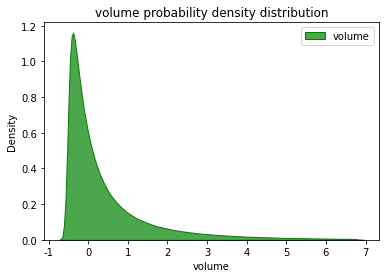

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
# 密度图

# Draw Plot
sns.kdeplot(df_['volume'], shade=True, color="g", label="volume", alpha=.7)

# Decoration
plt.title('volume probability density distribution')
plt.legend()
plt.show()

### 5.2 turnover

In [27]:
df_['turnover'].describe()

count    4.122511e+06
mean     4.320753e-01
std      1.165620e+00
min     -5.663634e-01
25%     -3.101749e-01
50%      0.000000e+00
75%      6.898251e-01
max      6.689880e+00
Name: turnover, dtype: float64

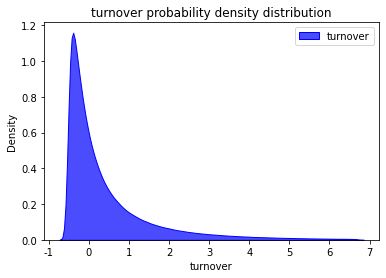

In [28]:
# Draw Plot
sns.kdeplot(df_['turnover'], shade=True, color="b", label="turnover", alpha=.7)

# Decoration
plt.title('turnover probability density distribution')
plt.legend()
plt.show()

### 5.3 turn

In [29]:
df_['turn'].describe()

count    4.122511e+06
mean     5.576856e-01
std      1.810715e+00
min     -6.224911e-01
25%     -3.152786e-01
50%      0.000000e+00
75%      6.847214e-01
max      3.948706e+01
Name: turn, dtype: float64

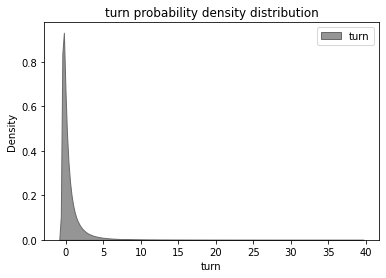

In [30]:
# Draw Plot
sns.kdeplot(df_['turn'], shade=True, color="dimgray", label="turn", alpha=.7)

# Decoration
plt.title('turn probability density distribution')
plt.legend()
plt.show()

### 5.4 vwap

In [31]:
df_['vwap'].describe()

count    4.122511e+06
mean     3.467663e-01
std      1.069658e+00
min     -8.312472e-01
25%     -3.603709e-01
50%      0.000000e+00
75%      6.396291e-01
max      6.213860e+00
Name: vwap, dtype: float64

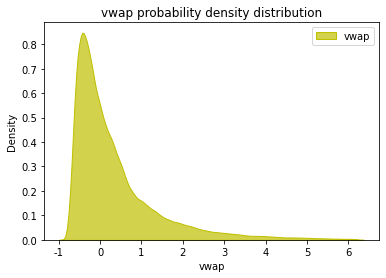

In [32]:
# Draw Plot
sns.kdeplot(df_['vwap'], shade=True, color="y", label="vwap", alpha=.7)

# Decoration
plt.title('vwap probability density distribution')
plt.legend()
plt.show()

### 5.5 pct_chg

In [33]:
df_['pct_chg'].describe()

count    4.122511e+06
mean    -4.557679e-03
std      1.120492e+00
min     -1.430898e+01
25%     -5.251436e-01
50%      0.000000e+00
75%      4.748564e-01
max      2.159825e+02
Name: pct_chg, dtype: float64

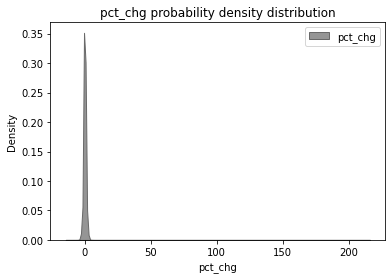

In [34]:
# Draw Plot
sns.kdeplot(df_['pct_chg'], shade=True, color="dimgray", label="pct_chg", alpha=.7)

# Decoration
plt.title('pct_chg probability density distribution')
plt.legend()
plt.show()

### 5.6 adj_open

In [35]:
df_['adj_open'].describe()

count    4.122511e+06
mean     3.314252e-01
std      1.092066e+00
min     -8.652582e-01
25%     -3.773241e-01
50%      0.000000e+00
75%      6.226759e-01
max      6.084293e+00
Name: adj_open, dtype: float64

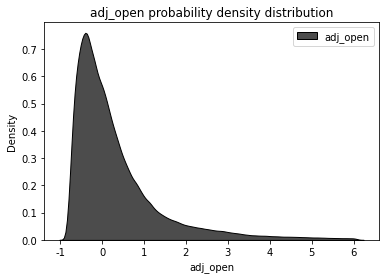

In [36]:
# Draw Plot
sns.kdeplot(df_['adj_open'], shade=True, color="black", label="adj_open", alpha=.7)

# Decoration
plt.title('adj_open probability density distribution')
plt.legend()
plt.show()

### 5.7 high_low

In [37]:
df_['high_low'].describe()

count    4.122511e+06
mean     4.044047e-01
std      1.252861e+00
min     -6.675798e-01
25%     -3.394307e-01
50%      0.000000e+00
75%      6.605693e-01
max      3.191255e+01
Name: high_low, dtype: float64

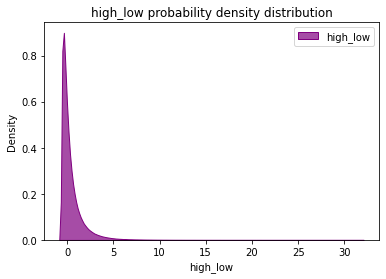

In [38]:
# Draw Plot
sns.kdeplot(df_['high_low'], shade=True, color="purple", label="high_low", alpha=.7)

# Decoration
plt.title('high_low probability density distribution')
plt.legend()
plt.show()

### 5.8 close_open

In [39]:
df_['close_open'].describe()

count    4.122511e+06
mean     1.944316e-02
std      1.933610e+00
min     -6.459290e+01
25%     -4.928722e-01
50%      0.000000e+00
75%      5.071278e-01
max      4.655401e+01
Name: close_open, dtype: float64

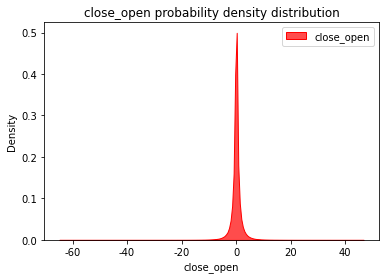

In [40]:
# Draw Plot
sns.kdeplot(df_['close_open'], shade=True, color="red", label="close_open", alpha=.7)

# Decoration
plt.title('close_open probability density distribution')
plt.legend()
plt.show()

## 6. 分开训练集和测试集

In [41]:
df_.set_index(['dt'], inplace = True)
df_.index = pd.to_datetime(df_.index)
df_

,kdcode,volume,turnover,turn,vwap,vwap_mean3,vwap_mean5,vwap_mean10,vwap_mean20,pct_chg,chg_mean3,chg_mean5,chg_mean10,adj_open,open_mean3,open_mean5,open_mean10,high_low,close_open,label
dt,,,,,,,,,,,,,,,,,,,,
2016-01-04,000004.SZ,-0.318858,0.370754,0.653958,2.613770,2.611377,2.608712,2.603021,2.590021,-3.880180,-6.304462,-7.924825,-11.048206,5.644867,5.642966,5.642830,5.642189,17.540759,-31.322711,0.0
2016-01-05,000004.SZ,-0.152829,0.877918,1.548724,2.285711,2.447453,2.444911,2.439473,2.427068,-2.470317,-5.154499,-6.480507,-9.033513,4.448680,5.045024,5.044872,5.044218,12.102352,8.052462,0.0
2016-01-06,000004.SZ,-0.336353,0.225927,0.559698,2.309269,2.400660,2.398153,2.392787,2.380552,0.501591,-3.155143,-3.969377,-5.530713,4.605324,4.897912,4.897756,4.897098,6.216480,3.957990,0.0
2016-01-07,000004.SZ,-0.508355,-0.407915,-0.367239,2.072347,2.220303,2.315626,2.310387,2.298452,-3.882159,-3.156219,-4.959252,-6.911500,4.591084,4.546739,4.820638,4.819979,10.484598,-22.110149,0.0
2016-01-08,000004.SZ,-0.236472,0.462116,1.097965,1.964784,2.113396,2.244627,2.239497,2.227821,0.242084,-1.681295,-3.863164,-5.382556,4.111185,4.434269,4.678409,4.677747,15.750904,2.388442,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-26,688600.SH,-0.514694,-0.507466,-0.345995,0.386492,0.397377,0.396838,0.425626,0.424501,-0.147447,-0.107606,-0.303945,-0.475431,-0.515812,-0.512767,-0.512394,-0.503448,-0.503884,0.069544,0.0
2021-07-27,688600.SH,-0.484503,-0.461340,-0.139655,0.421314,0.401870,0.401931,0.420365,0.423243,0.620829,0.109716,0.230296,-0.576346,-0.513152,-0.513090,-0.513796,-0.505044,-0.328496,0.231815,0.0
2021-07-28,688600.SH,-0.503676,-0.492065,-0.270962,0.379582,0.394838,0.397214,0.409845,0.420194,-1.226137,-0.384007,-0.323025,-0.840277,-0.509282,-0.513090,-0.512587,-0.507366,-0.252494,-0.533174,0.0


In [42]:
dateSepVal = pd.to_datetime("2020-01-01")
train_df = df_[df_.index < dateSepVal]
test_df = df_[df_.index > dateSepVal]

## 7. 保存到文件

In [27]:
train_df.to_csv('biClsData/trainData4.csv')

In [28]:
test_df.to_csv('biClsData/testData4.csv')